# Image Compression and Reconstruction with Deep Autoencoder

### Import Libraries

In [1]:
import tensorflow as tf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import keras
from keras.layers import Input, Dense
from keras.models import Model,Sequential
from keras.utils import plot_model

### Read MNIST Data

In [6]:
(images_train, _), (images_test, _) = keras.datasets.mnist.load_data()

images_train=np.array(images_train).reshape(60000,784)/255
images_test=np.array(images_test).reshape(10000,784)/255

11493376/11490434 [==============================] - 0s 0us/step


## Define Encoder and Decoder

In [7]:
encoding_dim = 32
input_dim = 784

autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

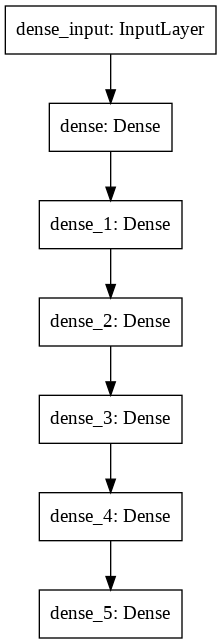

In [8]:
plot_model(autoencoder)

In [9]:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


### Train the Autoencoder

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(images_train, images_train,
                epochs=100, batch_size=256,
                validation_data=(images_test, images_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2422 - val_loss: 0.1665
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1501 - val_loss: 0.1360
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1296 - val_loss: 0.1222
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1200 - val_loss: 0.1143
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1135 - val_loss: 0.1094
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1095 - val_loss: 0.1065
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1039
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1043 - val_loss: 0.1018
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1024 - val_loss: 0.1001
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1007 - val_lo

### Test the Autoencoder

In [12]:
# randomly select 10 indices for test images
num_images = 10
random_test_images = np.random.randint(images_test.shape[0], size=num_images)

We can get the encoded compressed/latent representation of the original input image. In order to get this, we have to take output from the end of the encoder network.

In [13]:
# Get encoded representation
encoded_imgs = encoder.predict(images_test)

Make prediction with the Autoencoder. The output of the autoencoder is the reconstructed image.

In [14]:
# Get the reconstructed images
decoded_imgs = autoencoder.predict(images_test)

Let's plot the actual and the generated images along with the lower dimensional latent representation of the original images from which the reconstructed images have been formed.

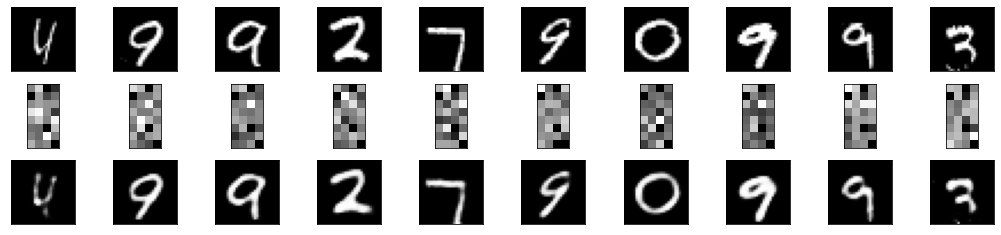

In [15]:
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot the original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(images_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot the encoded image (compressed/latent representation)
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot the reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Dimension of the Images

Dimension of the Orginal Image - a vector of the following size:

In [19]:
images_test.shape[1]

(10000, 784)

Dimension of the Encoded/Compressed/latent Image - a vector of the following size:

In [20]:
encoded_imgs.shape[1]

32

Dimension of the Reconstructed Image - a vector of the following size:

In [21]:
decoded_imgs.shape[1]

784

In [28]:
# Compression Ratio

images_test.shape[1]/encoded_imgs.shape[1]

24.5